# Homework 3
### CSE 802
### David Rackerby

1. Consider a two-category (ω1 and ω2) classification problem with equal priors. Each feature is a two- dimensional vector x = (x1, x2)t . The class-conditional densities are:
p(x|ω1) ∼ N(μ1 = (0,0)t , Σ1 = 2I),
p(x|ω2) ∼ N(μ2 = (3,3)t , Σ2 = I).

(a) [7 points] Derive the Bayes decision rule and the Bayes decision boundary. The Bayes decision rule must be written in terms of the Bayes decision boundary.


Start with the minimum-error-rate classification:
$g_i(\textbf{x})$ = ln $p(\textbf{x}|\omega_i) +$ ln$P(\omega_i)$

With equal priors, this reduces to $g_i(\textbf{x})$ = ln $p(\textbf{x}|\omega_i)$
Then expand using the formula for MVG:
$g_i(\textbf{x}) = -\frac{1}{2}(\textbf{x}-\textbf{\mu}_i)^t\Sigma_i^{-1}(\textbf{x}-\textbf{\mu}_i) - \frac{d}{2}$ln$2\pi - \frac{1}{2}|\Sigma_i|$

Which we further reduce to remove additive constants: $g_i(\textbf{x}) = -\frac{1}{2}(\textbf{x}-\textbf{\mu}_i)^t\Sigma_i^{-1}(\textbf{x}-\textbf{\mu}_i)-\frac{1}{2}|\Sigma_i|$

Then plug-in the MVG parameters for each class:
$g_1(\textbf{x}) = -\frac{1}{2}\textbf{x}^t\begin{bmatrix}\frac{1}{2} & 0 \\ 0 & \frac{1}{2} \end{bmatrix}\textbf{x} - 2 = -\frac{1}{2}\textbf{x}^t \frac{1}{2}I\textbf{x} - 2 = -\frac{1}{4}\textbf{x}^t\textbf{x} - 2 = -\frac{1}{4}(x_1^2 + x_2^2) - 2$

$g_2(\textbf{x}) = -\frac{1}{2}\begin{pmatrix} x_1 - 3 \\ x_2 - 3 \end{pmatrix}^t I \begin{pmatrix} x_1 - 3 \\ x_2 - 3 \end{pmatrix} - \frac{1}{2} = -\frac{1}{2}((x_1 - 3)^2 + (x_2 - 3)^2) - \frac{1}{2} = -\frac{1}{2}x_1^2 - \frac{1}{2}x_2^2 + 3x_1 + 3x_2 - \frac{19}{2}$

Set the discriminant functions equal to each other to derive the decision boundary:
$g_1(\textbf{x}) = g_2(\textbf{x})$

$\implies -\frac{1}{4}(x_1^2 + x_2^2) - 2 = -\frac{1}{2}x_1^2 - \frac{1}{2}x_2^2 + 3x_1 + 3x_2 - \frac{19}{2}$

$\implies \frac{1}{4}x_1^2 + \frac{1}{4}x_2^2 - 3x_1 - 3x_2 + \frac{15}{2} = 0$

$\implies x_1^2 + x_2^2 - 12x_1 - 12x_2 + 30 = 0$

$\implies x_1^2 + x_2^2 - 12x_1 - 12x_2 + 72 = 42$

$\implies (x_1 - 6)^2 + (x_2 - 6)^2 = 42$

The decision boundary is a circle centered at (6, 6) with a radius of $\sqrt{42}$. The decision rule is the following: assign $\textbf{x}$ to class $\omega_1$ if $(x_1 - 6)^2 + (x_2 - 6)^2$ is greater than 42 (outside the circle); otherwise, assign $\textbf{x}$ to $\omega_2$

(b) [10 points] What are the theoretical Bhattacharyya and Chernoff bounds on the probability of misclassification, P(error)?

Begin with the formula for the Chernoff Bound:
$P(error) \leq P^\beta(\omega_1)P^{1-\beta}(\omega_2)\int p^\beta(\textbf{x}|\omega_1)p^{1-\beta}(\textbf{x}|\omega_2)d\textbf{x}$ for $0 \leq \beta \leq 1.$
Since priors are equal, $P^\beta(\omega_1)P^{1-\beta}(\omega_2) = 0.5$.
Since the likelihoods are both multivariate gaussian, $\int p^\beta(\textbf{x}|\omega_1)p^{1-\beta}(\textbf{x}|\omega_2)d\textbf{x} = e^{-k(\beta)}$ where

$$k(\beta) = \frac{\beta(1-\beta)}{2}(\textbf{\mu}_2 - \textbf{\mu}_1)^t [\beta\Sigma_1 + (1-\beta)\Sigma_2]^{-1}(\textbf{\mu}_2 - \textbf{\mu}_1) + \frac{1}{2}$ln$\frac{|\beta\Sigma_1 + (1-\beta)\Sigma_2|}{|\Sigma_1|^\beta |\Sigma_2|^{1-\beta}$$

Now we plug-in the means and variances for both classes and simplify:

$$k(\beta) = \frac{\beta(1-\beta)}{2}\begin{pmatrix} 3 \\ 3\end{pmatrix}^t [2\beta I + (1-\beta) I]^{-1} \begin{pmatrix} 3 \\ 3 \end{pmatrix} + \frac{1}{2}ln\frac{|2 \beta I + (1-\beta)I|}{|2I|^{\beta}|I|^{1-\beta}$$


$$= \frac{\beta(1-\beta)}{2}\begin{pmatrix} 3 \\ 3\end{pmatrix}^t [(1+\beta)I]^{-1} \begin{pmatrix} 3 \\ 3 \end{pmatrix} + \frac{1}{2}ln\frac{|(1+\beta)I|}{|2I|^{\beta}|I|^{1-\beta}$$


$$= \frac{\beta(1-\beta)}{2}\begin{pmatrix} 3 \\ 3\end{pmatrix}^t \frac{1}{1+\beta}I \begin{pmatrix} 3 \\ 3 \end{pmatrix} + \frac{1}{2}ln\frac{(1+\beta)^2}{4^{\beta}$$


$$= \frac{\beta(1-\beta)}{2(1+\beta)}\begin{pmatrix} 3 \\ 3\end{pmatrix}^t I \begin{pmatrix} 3 \\ 3 \end{pmatrix} + ln(1+\beta) - \frac{\beta}{2}ln(4)$$

$$= \frac{9\beta(1-\beta)}{1+\beta} + ln(1+\beta) - \frac{\beta}{2}ln(4)$$

Now that everything is in terms of $\beta$, we derive $e^{-k(\beta)}$ with respect to $\beta$ and find the local minimum by setting $\beta = 0$ and finding the solution in the range [0, 1]:
$\frac{d}{d\beta}e^{-k(\beta)} = 0$ when $\beta = 0.41527$

Thus, the theoretical Chernoff bound on the error is $P(error) \leq 0.5 \cdot e^{-k(0.41527)} = 0.100585$.

To calculate the Bhattacharyya bound, we set $\beta = 0.5$ and take the output: $P(error) \leq 0.5 \cdot e^{-k(0.5)} = 0.10518$


(c) [3 points] Now generate 10,000 bivariate random patterns from each of the two densities (if you are using matlab, then the mvnrnd function can be used to generate these patterns). Plot these patterns in a graph using different markers to distinguish the two classes. On the same graph, plot the Bayes decision boundary derived earlier.

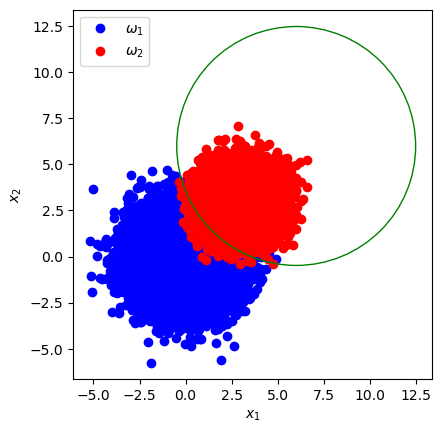

In [57]:
import numpy as np
import matplotlib.pyplot as plt

mean_1 = np.array([0, 0])
mean_2 = np.array([3, 3])

cov_1 = 2*np.identity(2)
cov_2 = np.identity(2)

class_1_sample = np.random.multivariate_normal(mean=mean_1, cov=cov_1, size=10_000)
class_2_sample = np.random.multivariate_normal(mean=mean_2, cov=cov_2, size=10_000)

plt.plot(class_1_sample[:,0], class_1_sample[:,1], 'bo', label=r'$\omega_1$')
plt.plot(class_2_sample[:,0], class_2_sample[:,1], 'ro', label=r'$\omega_2$')
circle = plt.Circle(xy=(6, 6), radius=(42**0.5), color='g', fill=False, zorder=2)
plt.gca().add_patch(circle)
plt.gca().set_aspect('equal')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

In [58]:
def predict(x: np.ndarray) -> int:
    if (x[0] - 6) * (x[0] - 6) + (x[1] - 6) * (x[1] - 6) > 42:
        return 0
    return 1

# Decision pairs are of the form (actual, predicted)
class_1_decisions = [(0, predict(x)) for x in class_1_sample]
class_2_decisions = [(1, predict(x)) for x in class_2_sample]

all_decisions = class_1_decisions + class_2_decisions
confusion = np.zeros((2, 2))

for decision in all_decisions:
    confusion[decision[0]][decision[1]] += 1

error_count = 0
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        if i != j:
            error_count += confusion[i][j]

empirical_error_rate = error_count / len(all_decisions)
print("Note here: an element in the ith row and the jth column means it is actually from class i, but has been classified as class j")
print(f"Confusion matrix of two classes:\n{confusion}")
print(f"Number of misclassified patterns: {error_count}")
print(f"Empirical error rate: {empirical_error_rate}")

Note here: an element in the ith row and the jth column means it is actually from class i, but has been classified as class j
Confusion matrix of two classes:
[[9341.  659.]
 [ 172. 9828.]]
Number of misclassified patterns: 831.0
Empirical error rate: 0.04155


2. Consider the following bivariate density function for the random variable x:
poriginal(x) ∼ N([0 0]^t, [[20 10],[10 30]]

(a) [5 points] Compute and report the whitening transform, Aw , of x ? (You can use matlab (or any
other programming language) to compute the eigenvectors/values).

In [59]:
mean = np.array([0, 0])
cov_mat = np.array([[20, 10], [10, 30]])

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
Phi = eigen_vecs
neg_sqrt_vals = [1/(val ** 0.5) for val in eigen_vals]
Lambda_1_2 = np.diag(neg_sqrt_vals)
(A_w := Phi @ Lambda_1_2)

array([[-0.22882456, -0.0874032 ],
       [ 0.14142136, -0.14142136]])

(b) [3points]When the whitening transformation is applied to x, what is the density function p_transform
of the resulting random variable?

In [60]:
whitened_mean = A_w @ mean
whitened_cov_mat = A_w.T @ cov_mat @ A_w

whitened_mean, whitened_cov_mat

(array([0., 0.]),
 array([[1.00000000e+00, 1.45450115e-17],
        [6.70279746e-17, 1.00000000e+00]]))

If the original mean was nonzero, we would see a linearly transformed mean. Additionally, the transformed covariance matrix is equal to the identity $I_2$. Hence p$_{transform}(\textbf{x}) \sim N(\mu', \Sigma')$ where $\mu' = \begin{pmatrix}0\\0\end{pmatrix}$ and $\Sigma' = I$

(c) [5 points] Generate 10,000 bivariate random patterns from poriginal (if you are using matlab, then the mvnrnd function can be used to generate these patterns). Plot these patterns in a graph. (Ensure that the scale along the two axis are the same - in matlab that would be “axis equal").


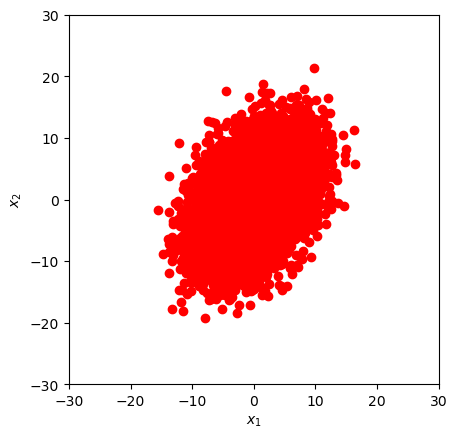

In [61]:
random_patterns = np.random.multivariate_normal(mean=mean, cov=cov_mat, size=10_000)

plt.plot(random_patterns[:,0], random_patterns[:,1], 'ro')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

(d) [5 points] Apply the whitening transform, Aw , to the 10,000 bivariate patterns generated above. Plot the transformed patterns in a separate graph. (Ensure that the scale along the two axis are the same - in matlab that would be “axis equal").

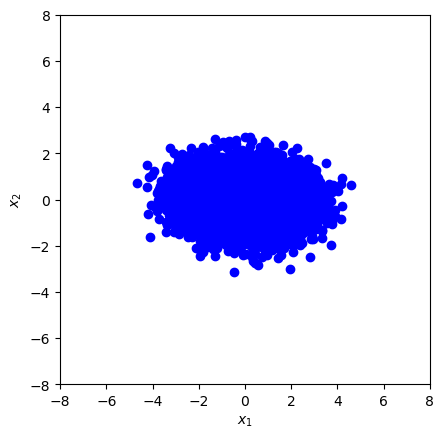

In [62]:
random_patterns_transformed = np.array([A_w @ v for v in random_patterns])

plt.plot(random_patterns_transformed[:,0], random_patterns_transformed[:,1], 'bo')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

(e) [2 points] Compare the distribution of patterns in 2c and 2d. What do you observe?.

Previously, there were clear signs of statistical independence. However, the points are now projected in such a way that the statistical independence is eliminated.

3. [10 points] Let p(x | ωi) ∼ N(μi,σ2) for a two-class one-dimensional problem with P(ω1) = P(ω2) = 0.5. Show that the minimum error classification rule results in the following probability of misclassification:
P(error) = 1/sqrt(2π) * integral from a->infinity of e\^(-u^2 / 2) du
where a =| μ2 − μ1 | /(2σ).

Recall that the original $P(error)$ was the simple rule of the probability of misclassifying a sample. Specifically, the probability of classifying a sample from class 1 while in class 2 and vice versa. This error occurs throughout all regions where the sample is missclassified.
$P(error) = P(x\in R_2 | \omega_1)P(\omega_1) + P(x \in R_1|\omega_2)P(\omega_2) = \int_R_2 p(x|\omega_1)P(\omega_1)dx + \int_R_1 p(x|\omega_2)P(\omega_2)dx$
Since the variances of both classes are the same, the minimum probability of error is obtained when setting the decision boundary to $x' = (\mu_1 + \mu_2)/2$.
$P(error) = \frac{1}{2}(\int_{x'}^\infty p(x|\omega_1)P(\omega_1)dx + \int_0^{x'} p(x|\omega_2)P(\omega_2)dx = \int_{x=(\mu_1 + \mu_2)/2}^\infty p(x|\omega_1)dx$
$=\int_{x=(\mu_1 + \mu_2)/2}^\infty \frac{1}{\sqrt{2\pi} \sigma} exp[-\frac{1}{2}\frac{(x-\mu_1)^2}{\sigma^2}]dx$
Changing $u = (x - \mu_1)/\sigma$ and $dx = \sigma du$ yields
$P(error) = \int_{u=a}^\infty \frac{1}{\sqrt{2\pi} \sigma} exp[-\frac{u^2}{2}]$
where $a = \frac{x - \mu_1}{\sigma} = (\frac{\mu_1 + \mu_2}{2})/\sigma = (\mu_2 - \mu_1)/2\sigma$.
Note it was not given whether $\mu_1 > \mu_2$, so we must use the absolute value of $a$:
$a = |\mu_2 - \mu_1|/2\sigma$

4. Consider a two-category classification problem involving two-dimensional feature vectors of the form
x = (x1, x2)t. The two categories are ω1 and ω2, and
p(x |ω1)∼N((4,4)t, I),
p(x |ω2)∼N((0,0)t, I), P(ω1) = P(ω2) = 1/2.

(a) [5points]Calculate the Bayes decision boundary and write down the Bayes decision rule assuming a 0-1 loss function. The Bayes decision rule has to be written in terms of the Bayes decision boundary.

With identity covariance matrices, 0-1 loss functions, and equal priors, the discriminant functions for both classes simplify to:
$g_i(\textbf{x}) = -\frac{1}{2}(\textbf{x}-\textbf{\mu}_i)^t(\textbf{x}-\textbf{\mu}_i)$

$g_1(\textbf{x}) = g_2(\textbf{x})$\
$\implies -\frac{1}{2}\begin{pmatrix}x_1 - 4 \\ x_2 - 4 \end{pmatrix}^t\begin{pmatrix}x_1 - 4 \\ x_2 - 4 \end{pmatrix} = -\frac{1}{2}\textbf{x}^t\textbf{x}$\
$\implies (x_1 - 4)^2 + (x_2 - 4)^2 = x_1^2 + x_2^2$\
$\implies x_1^2 - 8x_1 + 16 + x_2^2 - 8x_2 + 16 = x_1^2 + x_2^2$\
$\implies x_2 = -x_1 + 4$
Decision rule: assign $\textbf{x}$ to class $\omega_1$ if $x_2 > -x_1 + 4$; otherwise, assign to $\omega_2$

(b) [10 points] What are the Bhattacharyya and Chernoff theoretical bounds on the probability of misclassification, P(error)?

$$k(\beta) = \frac{\beta(1-\beta)}{2}(\textbf{\mu}_2 - \textbf{\mu}_1)^t [\beta\Sigma_1 + (1-\beta)\Sigma_2]^{-1}(\textbf{\mu}_2 - \textbf{\mu}_1) + \frac{1}{2}$ln$\frac{|\beta\Sigma_1 + (1-\beta)\Sigma_2|}{|\Sigma_1|^\beta |\Sigma_2|^{1-\beta}$$

$$\implies k(\beta) = \frac{\beta(1-\beta)}{2}(-4, -4)(-4, -4)^t$$
$$\implies k(\beta) = 16\beta(1-\beta)$$

Now that everything is in terms of $\beta$, we derive $e^{-k(\beta)}$ with respect to $\beta$ and find the local minimum by setting $\beta = 0$ and finding the solution in the range [0, 1]:
$\frac{d}{d\beta}e^{-k(\beta)} = 0$ when $\beta = 0.5$

Thus, the theoretical Chernoff bound on the error is $P(error) \leq 0.5 \cdot e^{-k(0.5)} = 0.01832$.
This is also the theoretical Bhattacharyya bound, since we're already solving for $\beta = 0.5$

(c) [5 points] Generate n = 25 test patterns from each of the two class-conditional densities and plot them in a two-dimensional feature space using different markers for the two categories (if you are using matlab, then the mvnrnd function can be used to generate these patterns). Draw the Bayes decision boundary on this plot for visualization purposes.

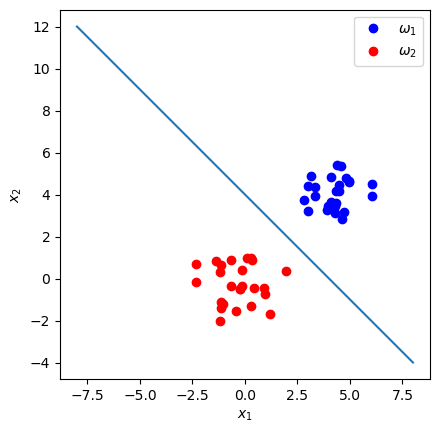

In [63]:
class_1_mean = np.array([4, 4])
class_2_mean = np.array([0, 0])

covariance = np.identity(2)

class_1_sample = np.random.multivariate_normal(mean=class_1_mean, cov=covariance, size=25)
class_2_sample = np.random.multivariate_normal(mean=class_2_mean, cov=covariance, size=25)

plt.plot(class_1_sample[:,0], class_1_sample[:,1], 'bo', label=r'$\omega_1$')
plt.plot(class_2_sample[:,0], class_2_sample[:,1], 'ro', label=r'$\omega_2$')

x = np.linspace(-8, 8, 100)
y = -x + 4
plt.plot(x, y)
plt.gca().set_aspect('equal')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

(d) [5 points] What is the confusion matrix and empirical error rate when classifying the generated patterns using the Bayes decision rule?

In [64]:
def predict_2(x: np.ndarray) -> int:
    if x[1] > -x[0] + 4:
        return 0
    return 1

# Decision pairs are of the form (actual, predicted)
class_1_decisions = [(0, predict_2(x)) for x in class_1_sample]
class_2_decisions = [(1, predict_2(x)) for x in class_2_sample]

all_decisions = class_1_decisions + class_2_decisions
confusion = np.zeros((2, 2))

for decision in all_decisions:
    confusion[decision[0]][decision[1]] += 1

error_count = 0
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        if i != j:
            error_count += confusion[i][j]

empirical_error_rate = error_count / len(all_decisions)
print("Note here: an element in the ith row and the jth column means it is actually from class i, but has been classified as class j")
print(f"Confusion matrix of two classes:\n{confusion}")
print(f"Number of misclassified patterns: {error_count}")
print(f"Empirical error rate: {empirical_error_rate}")

Note here: an element in the ith row and the jth column means it is actually from class i, but has been classified as class j
Confusion matrix of two classes:
[[25.  0.]
 [ 0. 25.]]
Number of misclassified patterns: 0.0
Empirical error rate: 0.0


(e) [5 points] Can the empirical error rate exceed the theoretical bounds on the probability of misclassification? Why or why not? (Hint: To help answer this question, do the following. Compute the empirical error rate by increasing the value of n from 100 to 500 to 1,000 to 5000 to 10,000. Plot the empirical error rate as a function of n. What do you observe? For each value of n, you may also want to generate the test patterns multiple times (say 3 times), to determine how the empirical error rate changes for the same value of n. Note that n is the number of test patterns from each class.)


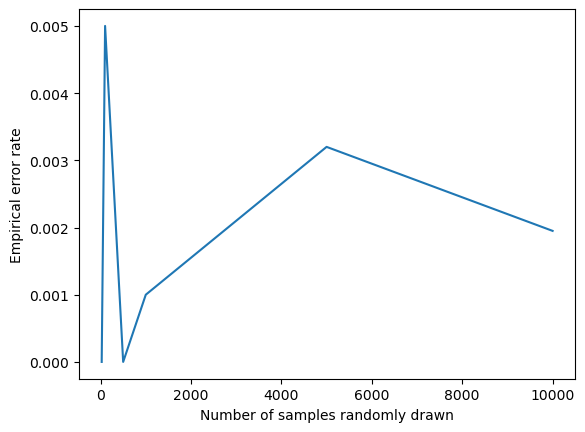

In [65]:
sample_nos = [25, 100, 500, 1000, 5000, 10000]
error_rates = []
for n in sample_nos:
    class_1_sample = np.random.multivariate_normal(mean=class_1_mean, cov=covariance, size=n)
    class_2_sample = np.random.multivariate_normal(mean=class_2_mean, cov=covariance, size=n)

    class_1_decisions = [(0, predict_2(x)) for x in class_1_sample]
    class_2_decisions = [(1, predict_2(x)) for x in class_2_sample]

    all_decisions = class_1_decisions + class_2_decisions
    confusion = np.zeros((2, 2))

    for decision in all_decisions:
        confusion[decision[0]][decision[1]] += 1

    error_count = 0
    for i in range(len(confusion)):
        for j in range(len(confusion[i])):
            if i != j:
                error_count += confusion[i][j]

    empirical_error_rate = error_count / len(all_decisions)
    error_rates.append(empirical_error_rate)

plt.plot(sample_nos, error_rates)
plt.xlabel('Number of samples randomly drawn')
plt.ylabel('Empirical error rate')
plt.show()

The empirical error rate is simply the mean number of errors over the number of samples. In contrast, the theoretical Chernoff bound encompasses the error over all possible values of $\textbf{x}$, and thus no matter how large of a sample size we draw to derive the empirical error rate, its finite-ness is what prevents it from spanning every possible error captured by the Chernoff bound.